data_storage/Market-1501-v15.09.15 found :)


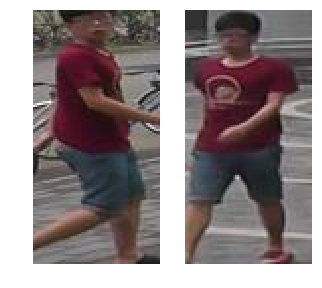

In [3]:
%matplotlib inline
from pak.datasets.Market1501 import Market1501
import matplotlib.pyplot as plt
from keras.models import load_model
import sys
sys.path.insert(0, '../')
from reid import reid

root = 'data_storage'
m1501 = Market1501(root)
X, Y = m1501.get_train()



model = reid.ReId()


def predict(A, B):
    pass


# ==== same ====
im1 = X[0]
im2 = X[2]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121); ax.axis('off')
ax.imshow(im1)
ax = fig.add_subplot(122); ax.axis('off')
ax.imshow(im2)
plt.show()

In [4]:
score = model.predict(im1, im2)

print(score)

a 4091.9294117647055
b 4351.498039215687
0.99130917
